# Measuring efficiency

## Import

In [6]:
import pandas as pd

In [7]:
L2_TARGET = 0.01160101
C2_TARGET = 0
N1_TARGET = 0.10666666666666667
N2_TARGET = 0.19814444234467493
F2_TARGET = 0.006381766381766379

## Reading our dataset

In [8]:
FILENAME = "NGEN=10000-C2-L2-N1-F2"

In [12]:
df = pd.read_csv(FILENAME + ".csv")
df = df.drop("Unnamed: 0", axis=1)

In [13]:
df.head

<bound method NDFrame.head of             0         1         2         3  label
0   -2.121306  0.576285  0.589282  0.059425      1
1    0.047784 -0.179791  1.876629 -2.068357      0
2    0.157749 -0.836196 -0.171464 -1.642031      0
3   -0.515116  2.218101  0.108040 -1.392121      1
4   -1.726644 -0.504826 -0.493694 -0.229235      1
..        ...       ...       ...       ...    ...
145  0.111862 -0.437193 -0.821960 -2.154456      0
146  0.988110  0.344125 -1.522369 -0.990553      0
147 -1.598806 -0.653624  0.172257 -0.439997      1
148  0.857105  0.376437  0.045159 -0.821073      0
149  0.764508  2.022739 -0.839454 -0.952149      0

[150 rows x 5 columns]>

## Measuring Complexity

### Setting up `ECOL`

In [16]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# Import Ecol
ecol = rpackages.importr('ECoL')


### Measuring our complexity

In [17]:
from rpy2.robjects import pandas2ri
from rpy2.robjects import Formula

pandas2ri.activate()

# Convert to r_df
r_df = pandas2ri.py2rpy(df)
fml = Formula('label ~ .')

#### C2 - L2 - N1 - F2

In [20]:
c2Vector = ecol.balance_formula(fml, df, measures="C2", summary="return")
c2 = c2Vector.rx(1)
c2 = c2[0][0]

l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

n1Vector = ecol.neighborhood_formula(fml, df, measures="N1")
n1 = n1Vector.rx(1)
n1 = n1[0][0]

f2Vector = ecol.overlapping_formula(fml, df, measures="F2")
f2 = f2Vector.rx(1)
f2 = f2[0][0]

data = {'Target': [C2_TARGET, L2_TARGET, N1_TARGET,
                   F2_TARGET], 'Result': [c2, l2, n1, f2]}

## Taking a look at the efficiency

In [21]:
df_plot = pd.DataFrame(data, index=['C2', 'L2', 'N1', 'F2'])


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

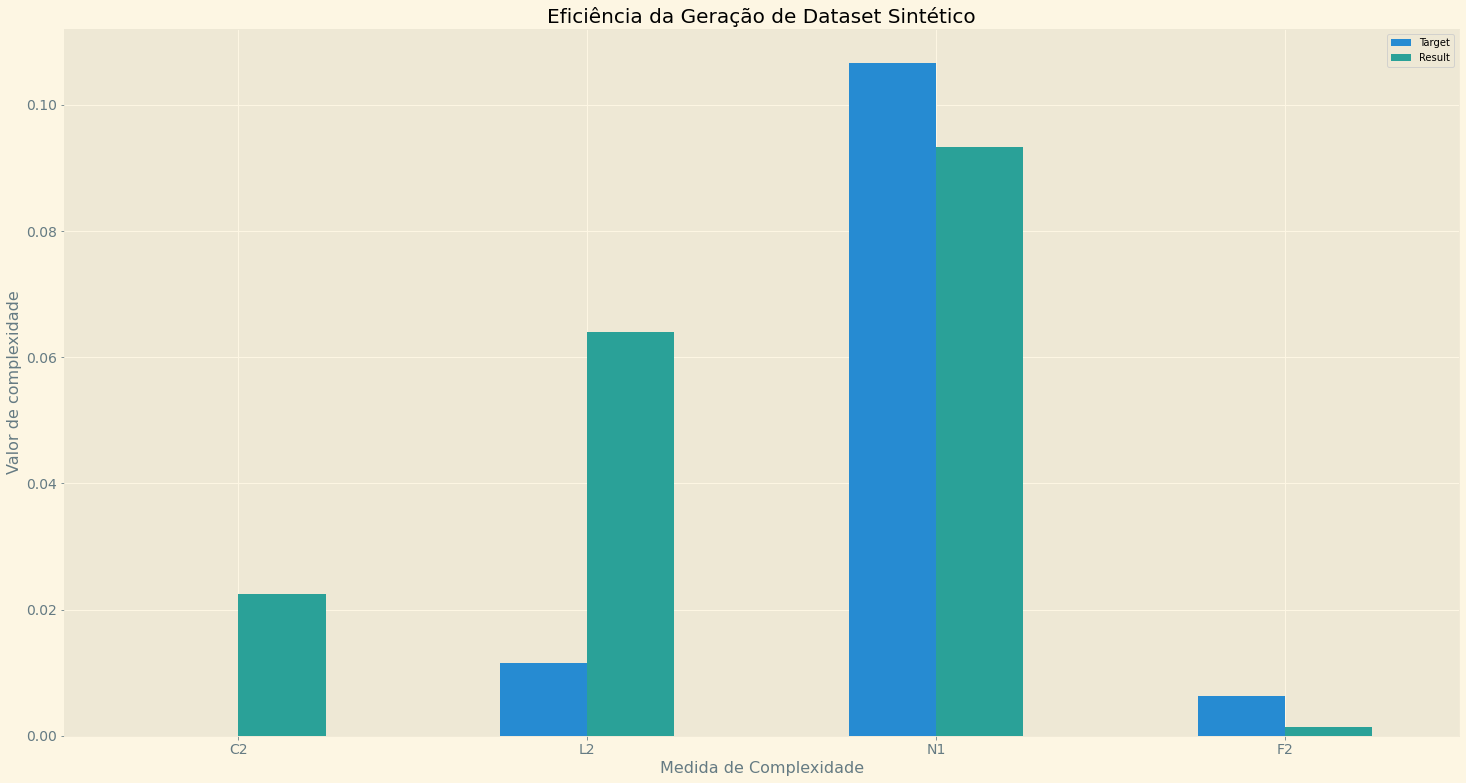

In [22]:
from matplotlib import pyplot as plt
import matplotlib

matplotlib.style.use('Solarize_Light2')
df_plot.plot.bar(figsize=(25, 13), rot=0)
plt.title("Eficiência da Geração de Dataset Sintético", fontsize=20)
plt.xlabel("Medida de Complexidade", fontsize=16)
plt.ylabel("Valor de complexidade", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)